In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly import tools
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df_titan=pd.read_csv('gdrive/My Drive/Colab Notebooks/ML/Assignment 5/archive/TITAN.csv')

Mounted at /content/gdrive


In [2]:
#!unzip /content/archive.zip

Archive:  /content/archive.zip
replace ADANIPORTS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ASIANPAINT.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace AXISBANK.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace BAJAJ-AUTO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace BAJAJFINSV.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace BAJFINANCE.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace BHARTIARTL.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace BPCL.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace BRITANNIA.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CIPLA.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace COALINDIA.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace DRREDDY.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace EICHERMOT.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace GAIL.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace GRASIM.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace HCLTECH.csv? [y]es, [n]o, [A]l

# For TITAN 

In [84]:
df_titan=pd.read_csv('gdrive/My Drive/Colab Notebooks/ML/Assignment 5/archive/TITAN.csv')

In [3]:
# df_titan=pd.read_csv("TITAN.csv")
df_titan

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TITAN,EQ,144.95,146.0,156.45,146.00,155.00,155.70,154.36,23000,3.550370e+11,NaN,NaN,NaN
1,2000-01-04,TITAN,EQ,155.70,152.0,152.00,144.00,148.05,147.40,146.72,26300,3.858700e+11,NaN,NaN,NaN
2,2000-01-05,TITAN,EQ,147.40,144.0,148.80,136.00,139.95,138.40,142.95,20600,2.944850e+11,NaN,NaN,NaN
3,2000-01-06,TITAN,EQ,138.40,142.0,149.50,141.00,149.50,149.50,147.87,31600,4.672750e+11,NaN,NaN,NaN
4,2000-01-07,TITAN,EQ,149.50,149.5,153.00,145.00,147.75,146.35,148.63,36600,5.439965e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,TITAN,EQ,1461.45,1470.0,1489.75,1465.15,1478.95,1479.85,1479.58,1020499,1.509913e+14,39416.0,228386.0,0.2238
5302,2021-04-27,TITAN,EQ,1479.85,1485.0,1503.55,1482.00,1498.00,1495.10,1494.21,1145908,1.712228e+14,42363.0,298862.0,0.2608
5303,2021-04-28,TITAN,EQ,1495.10,1505.0,1514.90,1491.70,1509.00,1508.85,1504.73,1037771,1.561564e+14,37985.0,212098.0,0.2044
5304,2021-04-29,TITAN,EQ,1508.85,1524.0,1527.50,1497.00,1504.35,1506.80,1510.30,1927546,2.911181e+14,63568.0,492144.0,0.2553


In [4]:
df_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [5]:
fig = go.Figure([go.Scatter(x=df_titan.index, y=df_titan['VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP over time',
    template="plotly_white",)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show(renderer="colab")

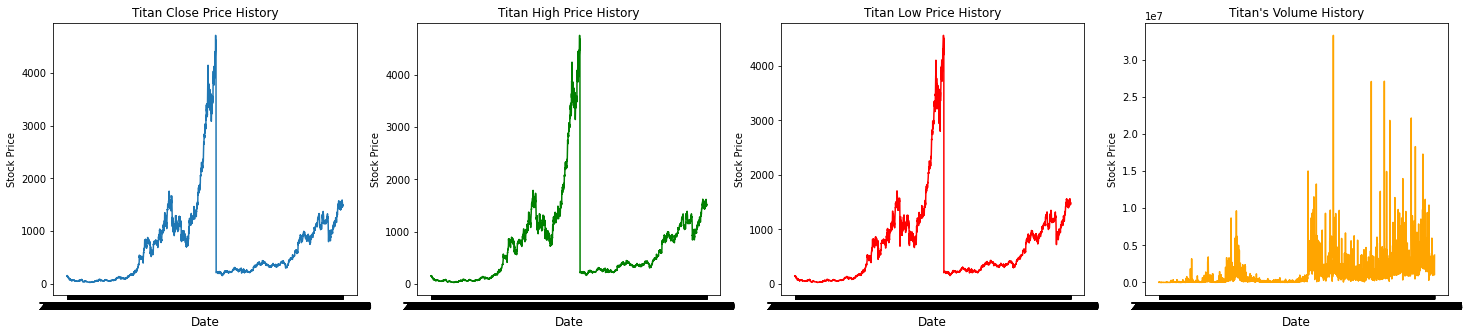

In [6]:
f, (ax1, ax2,ax3,ax4) = plt.subplots(1,4,figsize=(25,5))
ax1.plot(df_titan["Date"], df_titan["Close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Titan Close Price History")

# Second Subplot
ax2.plot(df_titan["Date"], df_titan["High"], color="green")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Titan High Price History")

# Third Subplot
ax3.plot(df_titan["Date"], df_titan["Low"], color="red")
ax3.set_xlabel("Date", fontsize=12)
ax3.set_ylabel("Stock Price")
ax3.set_title("Titan Low Price History")

# Fourth Subplot
ax4.plot(df_titan["Date"], df_titan["Volume"], color="orange")
ax4.set_xlabel("Date", fontsize=12)
ax4.set_ylabel("Stock Price")
ax4.set_title("Titan's Volume History")
plt.show()

In [6]:
#Plotting VWAP(Volume Weighted Average Price) over time
fig = go.Figure([go.Scatter(x=df_titan.Date, y=df_titan['Volume'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='Plotting VWAP(Volume Weighted Average Price) over time',
    template="plotly_white",)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show(renderer="colab")

In [7]:
df_titan['Date']=pd.to_datetime(df_titan['Date'])
df_titan.set_index(['Date'],inplace=True)

In [8]:
fig = go.Figure([go.Scatter(x=df_titan.loc['2020', 'VWAP'].index,y=df_titan.loc['2020', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2020',
    template="plotly_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")

fig.show(renderer="colab")


In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_table=missing_values_table(df_titan)
missing_table

Your selected dataframe has 14 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Trades,2850,53.7
Deliverable Volume,514,9.7
%Deliverble,514,9.7


# ARIMA Model

Check Stationarity i.e Dicky Fuller Test

if P Value > 0.05 we go ahead with finding the order of differencing.

In [13]:
df_titan.loc[:,"Date"]

0       2000-01-03
1       2000-01-04
2       2000-01-05
3       2000-01-06
4       2000-01-07
           ...    
5301    2021-04-26
5302    2021-04-27
5303    2021-04-28
5304    2021-04-29
5305    2021-04-30
Name: Date, Length: 5306, dtype: object

In [14]:
df_titan.columns.values.tolist()

['Date',
 'Symbol',
 'Series',
 'Prev Close',
 'Open',
 'High',
 'Low',
 'Last',
 'Close',
 'VWAP',
 'Volume',
 'Turnover',
 'Trades',
 'Deliverable Volume',
 '%Deliverble']

In [15]:
train_selection =df_titan.Date <= '2019-04-30'
train=df_titan[train_selection]
test_selection =df_titan.Date > '2019-04-30'
test=df_titan[test_selection]

In [16]:
train 

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TITAN,EQ,144.95,146.0,156.45,146.00,155.00,155.70,154.36,23000,3.550370e+11,NaN,NaN,NaN
1,2000-01-04,TITAN,EQ,155.70,152.0,152.00,144.00,148.05,147.40,146.72,26300,3.858700e+11,NaN,NaN,NaN
2,2000-01-05,TITAN,EQ,147.40,144.0,148.80,136.00,139.95,138.40,142.95,20600,2.944850e+11,NaN,NaN,NaN
3,2000-01-06,TITAN,EQ,138.40,142.0,149.50,141.00,149.50,149.50,147.87,31600,4.672750e+11,NaN,NaN,NaN
4,2000-01-07,TITAN,EQ,149.50,149.5,153.00,145.00,147.75,146.35,148.63,36600,5.439965e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,2019-04-23,TITAN,EQ,1123.70,1124.0,1136.70,1120.05,1128.35,1129.55,1129.50,1237289,1.397522e+14,40465.0,354909.0,0.2868
4806,2019-04-24,TITAN,EQ,1129.55,1128.0,1152.00,1125.55,1149.00,1149.15,1142.22,1809133,2.066433e+14,62637.0,681933.0,0.3769
4807,2019-04-25,TITAN,EQ,1149.15,1155.0,1165.00,1135.40,1145.65,1141.30,1154.25,3579153,4.131238e+14,76638.0,1762250.0,0.4924
4808,2019-04-26,TITAN,EQ,1141.30,1146.7,1149.50,1131.00,1139.20,1137.50,1137.10,846570,9.626380e+13,35603.0,289811.0,0.3423


In [19]:
ts=train.loc[:,['Date','VWAP']]
ts['Date']=pd.to_datetime(ts['Date'])
ts.set_index('Date',inplace=True)
ts.head()

,VWAP
Date,
2000-01-03,154.36
2000-01-04,146.72
2000-01-05,142.95
2000-01-06,147.87
2000-01-07,148.63


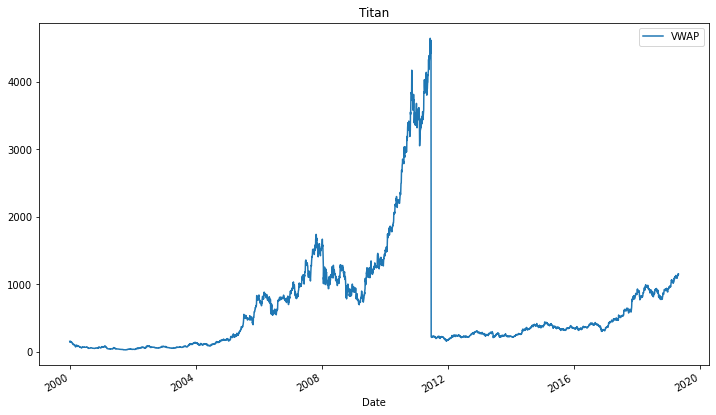

In [20]:
ts.plot(figsize=(12,7),title="Titan")

In [21]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.948478
p-value: 0.039994


In [22]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -27.562656
p-value: 0.000000


In [23]:
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0), the data is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data is stationary.")

In [24]:
dicky_fuller_test(df_titan['VWAP'])

ADF Statistic: -3.008441
p-value: 0.034114
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject the null hypothesis (H0), the data is stationary.


d=0

p is number of auto regressive terms 
(PACF plot)

q is no of moving avg terms(fore cast error terms)

In [25]:

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

In [33]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.0 MB/s 
     |████████████████████████████████| 9.9 MB 23.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


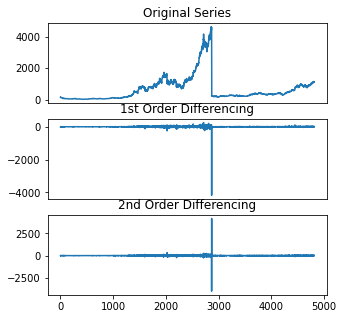

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(5, 5))
ax1.plot(train.VWAP)
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(train.VWAP.diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(train.VWAP.diff().diff())
ax3.set_title('2nd Order Differencing')
plt.show()

PACF and ACF plots

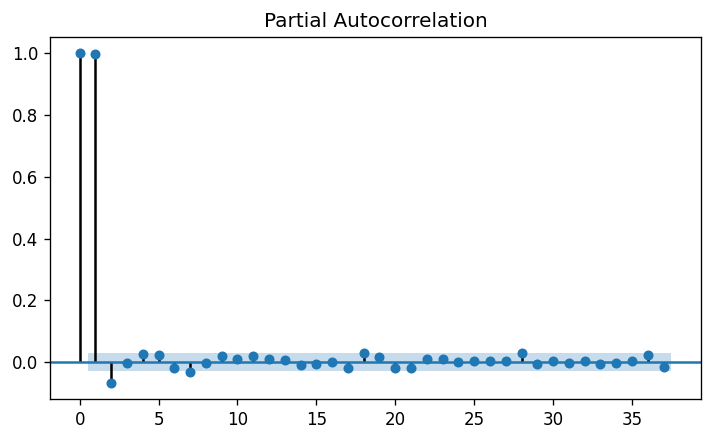

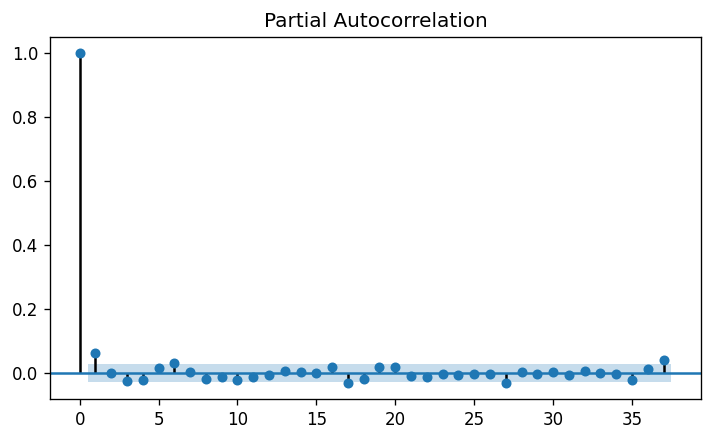

In [27]:
#PACF for p 
#count number of significant lags above significance region
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':120})
_=plot_pacf(ts.dropna())
_=plot_pacf(ts.diff().dropna())

d=0 p=2

d=1 p=1

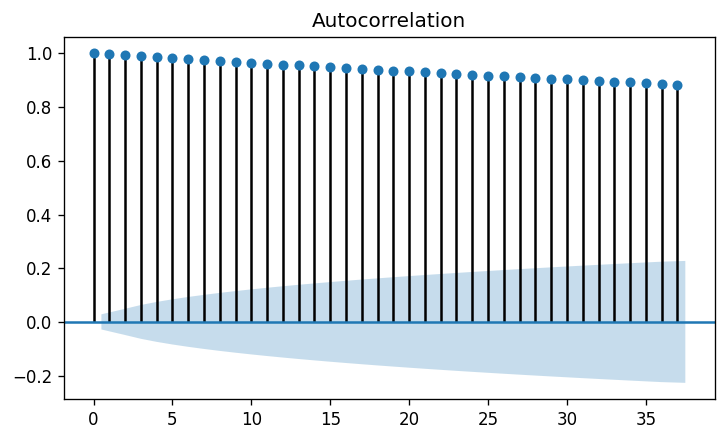

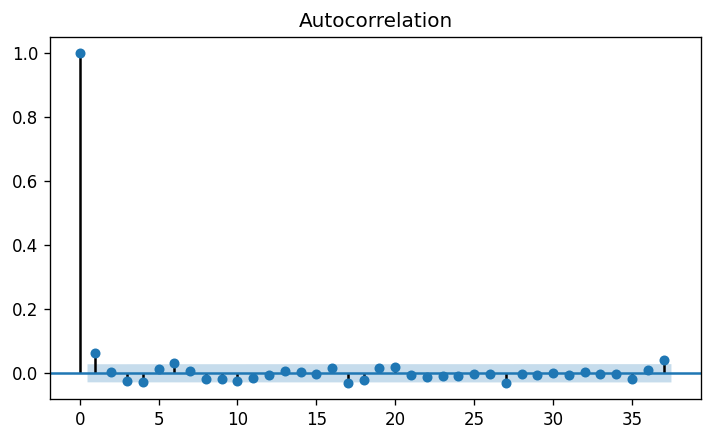

In [28]:
_ = plot_acf(train.VWAP)
_ = plot_acf(train.VWAP.diff().dropna())

q=1

In [29]:
#p,d,q
order=(1,1,1)
model=ARIMA(endog=ts,order=order)
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [30]:
model_fit.summary() #AIC Score must be low

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   VWAP   No. Observations:                 4810
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26833.305
Date:                Sun, 06 Nov 2022   AIC                          53672.610
Time:                        06:04:39   BIC                          53692.045
Sample:                             0   HQIC                         53679.435
                               - 4810                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0557      0.624      0.089      0.929      -1.167       1.278
ma.L1          0.0071      0.626      0.011      0.991      -1.219       1.233
sigma2      4115.7167      3.599   1143.720      0.000    4108.664    4122.770
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        2736589124.34
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                           -56.92
Prob(H) (two-sided):                  0.01   Kurtosis:                      3696.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
predictions=pd.Series(model_fit.forecast(len(test)))
predictions =predictions.map(lambda x:x if x>=0 else 0 )
print(predictions.head())
actuals=test['VWAP']

4810    1150.679003
4811    1150.724066
4812    1150.726576
4813    1150.726716
4814    1150.726724
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error as RMSLE
from sklearn.metrics import mean_absolute_percentage_error

print("MAE : ",mean_absolute_error(predictions,actuals))
print(" RMSLE : ",RMSLE(predictions,actuals))
print("MAPE : ",mean_absolute_percentage_error(predictions,actuals))

MAE :  154.60008432715088
 RMSLE :  0.02601190386443698
MAPE :  0.13434995579348868


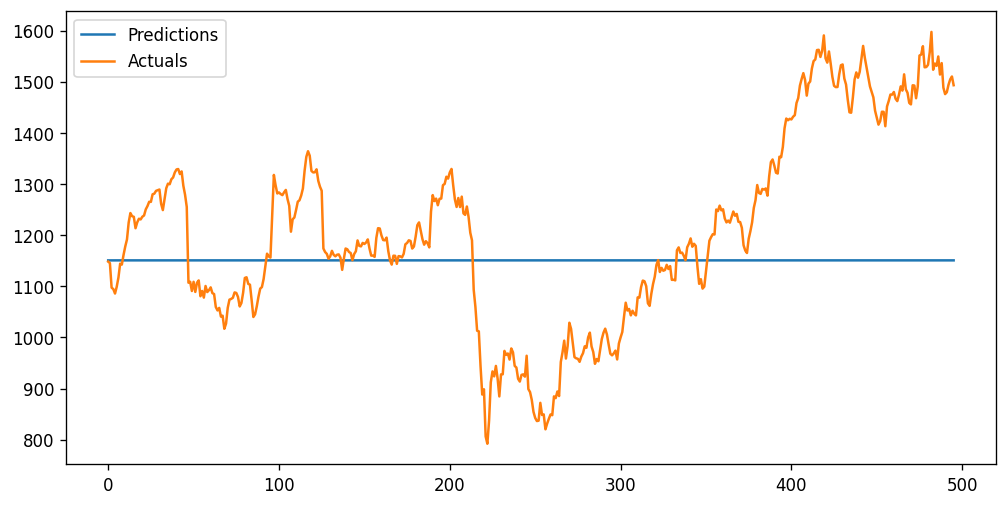

In [31]:
plt.figure(figsize=(10,5))
plt.plot(predictions.values,label='Predictions')
plt.plot(actuals.values,label='Actuals')
plt.legend(loc='best')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Text(0, 0.5, 'VWAP')

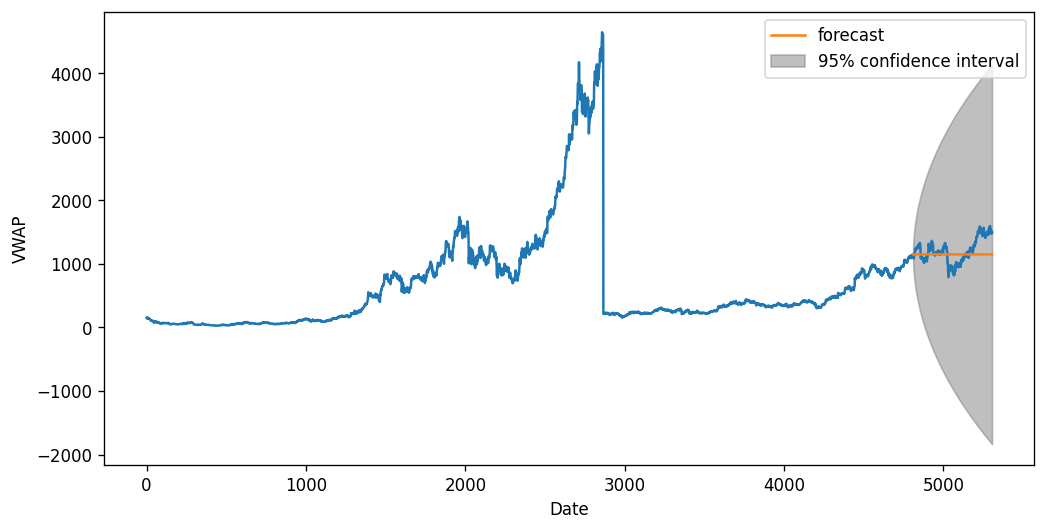

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(df_titan['VWAP'])
plot_predict(model_fit, start=len(ts), end=(len(df_titan)-1), ax=axs)
plt.xlabel('Date')
plt.ylabel('VWAP')

AUTO ARIMA

In [32]:
train_data=train.loc[:,['Date','VWAP']]
test_data=test.loc[:,['Date','VWAP']]
train_data['Date']=pd.to_datetime(train_data['Date'])
test_data['Date']=pd.to_datetime(test_data['Date'])
train_data.set_index('Date',inplace=True)
test_data.set_index('Date',inplace=True)
train_data.head()

,VWAP
Date,
2000-01-03,154.36
2000-01-04,146.72
2000-01-05,142.95
2000-01-06,147.87
2000-01-07,148.63


In [34]:
import pmdarima as pm
ARIMA_model = pm.auto_arima(train_data, m=12)
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4810
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -26826.190
Date:                Sun, 06 Nov 2022   AIC                          53664.379
Time:                        06:10:49   BIC                          53703.249
Sample:                             0   HQIC                         53678.029
                               - 4810                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3892      0.075      5.162      0.000       0.241       0.537
ar.L2         -0.9540      0.069    -13.828      0.000      -1.089      -0.819
ar.L3          0.0445      0.013      3.493      0.000       0.020       0.070
ma.L1         -0.3277      0.076     -4.312      0.000      -0.477      -0.179
ma.L2          0.9488      0.064     14.825      0.000       0.823       1.074
sigma2      4105.1508     13.058    314.370      0.000    4079.557    4130.745
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        2692342969.34
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                           -56.57
Prob(H) (two-sided):                  0.01   Kurtosis:                      3666.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
modela = ARIMA(train_data, order=(3,1,2))
modela_fit = modela.fit()
modela_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   VWAP   No. Observations:                 4810
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -26826.190
Date:                Sun, 06 Nov 2022   AIC                          53664.379
Time:                        06:58:58   BIC                          53703.249
Sample:                             0   HQIC                         53678.029
                               - 4810                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3892      0.075      5.162      0.000       0.241       0.537
ar.L2         -0.9540      0.069    -13.828      0.000      -1.089      -0.819
ar.L3          0.0445      0.013      3.493      0.000       0.020       0.070
ma.L1         -0.3277      0.076     -4.312      0.000      -0.477      -0.179
ma.L2          0.9488      0.064     14.825      0.000       0.823       1.074
sigma2      4105.1508     13.058    314.370      0.000    4079.557    4130.745
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        2692342969.34
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                           -56.57
Prob(H) (two-sided):                  0.01   Kurtosis:                      3666.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
df_t=df_titan.loc[:,['Date','VWAP']]
df_t['Date']=pd.to_datetime(df_t['Date'])
df_t.set_index('Date',inplace=True)
df_t.head()

,VWAP
Date,
2000-01-03,154.36
2000-01-04,146.72
2000-01-05,142.95
2000-01-06,147.87
2000-01-07,148.63


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



Text(0, 0.5, 'VWAP')

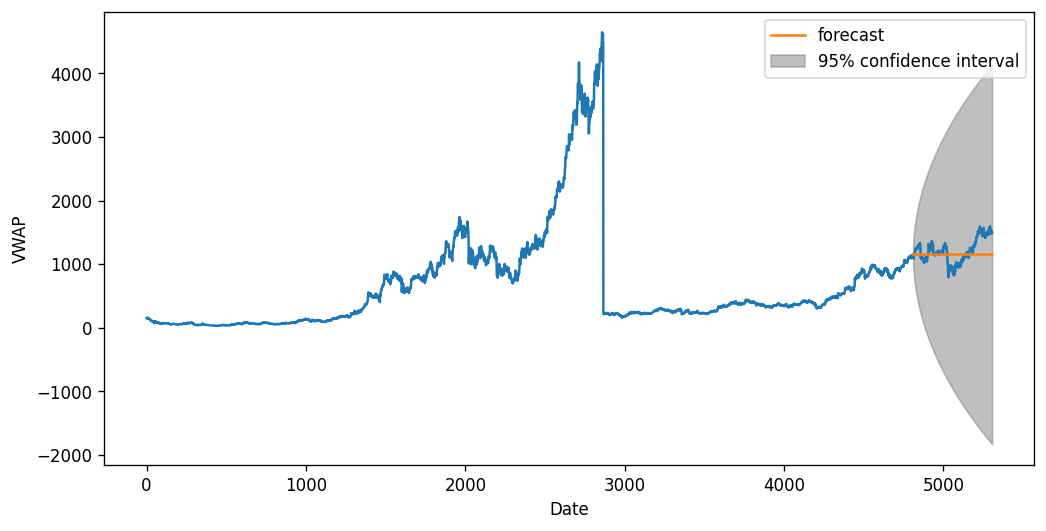

In [46]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(df_titan['VWAP'])
plot_predict(modela_fit, start=len(train_data), end=(len(df_titan)-1), ax=axs)
plt.xlabel('Date')
plt.ylabel('VWAP')

Text(0, 0.5, 'VWAP')

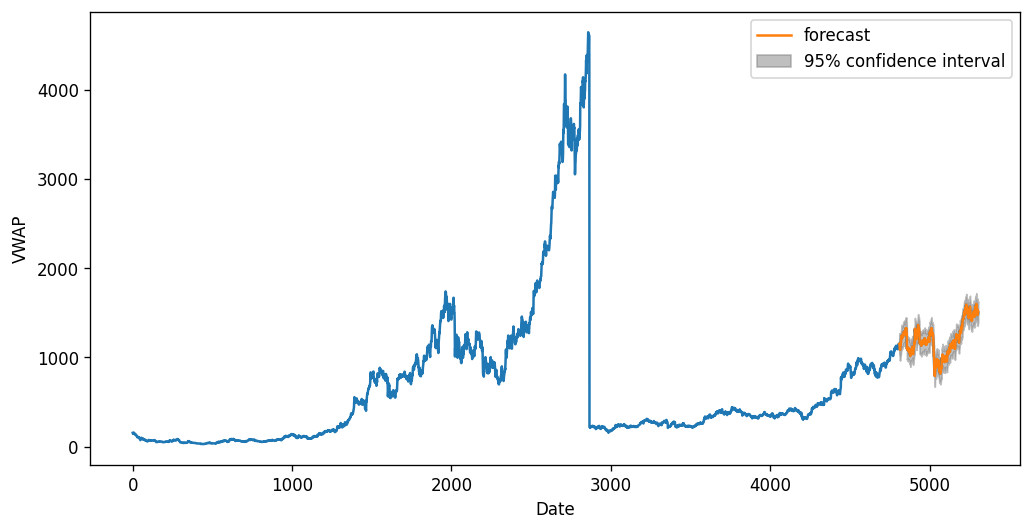

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(df_titan['VWAP'])
plot_predict(modela_fit, start=len(train_data), end=(len(df_titan)-1), ax=axs)
plt.xlabel('Date')
plt.ylabel('VWAP')

# FBProphet

In [68]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 128 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639157 sha256=62b21e8f2ed8d148c1cf6f3eb552c5f0b0c6ad12490d5946bcd2942a4030ecec
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver

In [69]:
df_train = df_titan[df_titan.Date < "2020"]
df_valid = df_titan[df_titan.Date >= "2020"]

from fbprophet import Prophet
model = Prophet()
model.fit(df_train[["Date", "VWAP"]].rename(columns={"Date": "ds", "VWAP": "y"}))

forecast1 = model.predict(df_valid[["Date", "VWAP"]].rename(columns={"Date": "ds", "VWAP": "y"}))
df_valid["Forecast_Prophet"] = forecast1.yhat.values

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


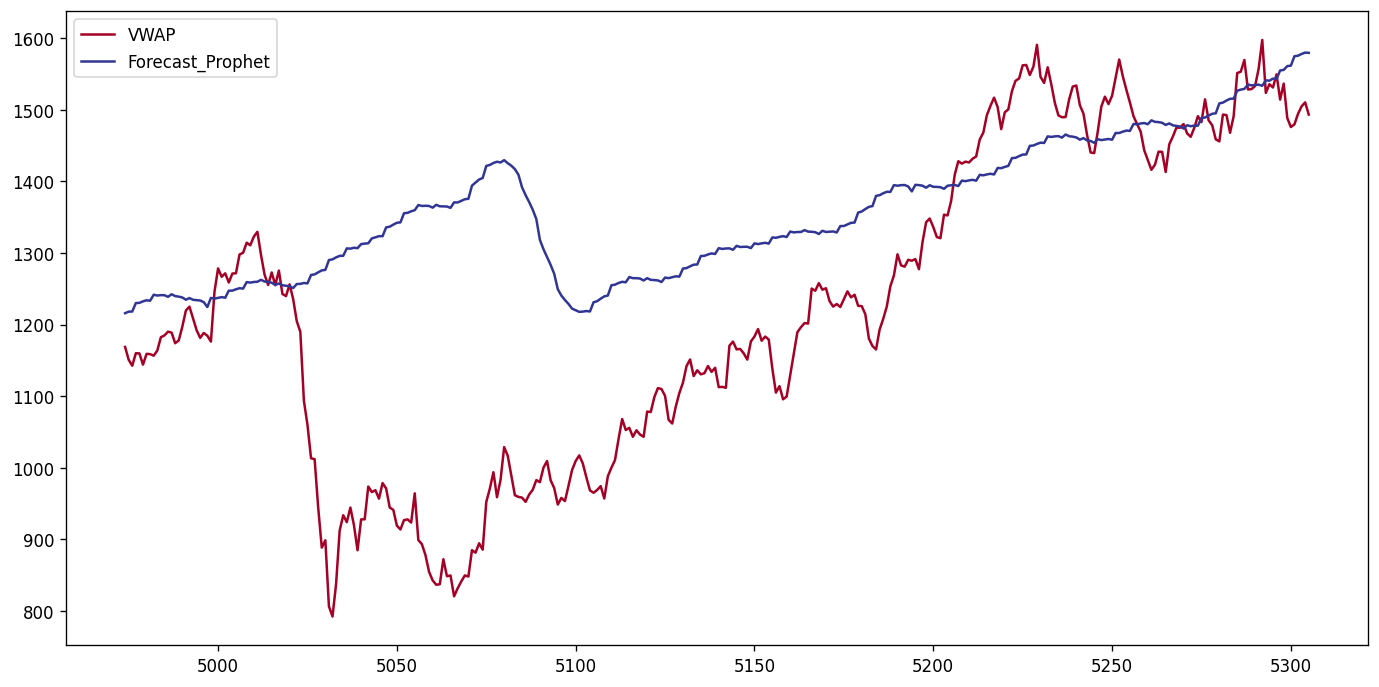

In [70]:
df_valid[["VWAP", "Forecast_Prophet"]].plot(figsize=(14, 7),cmap='RdYlBu')

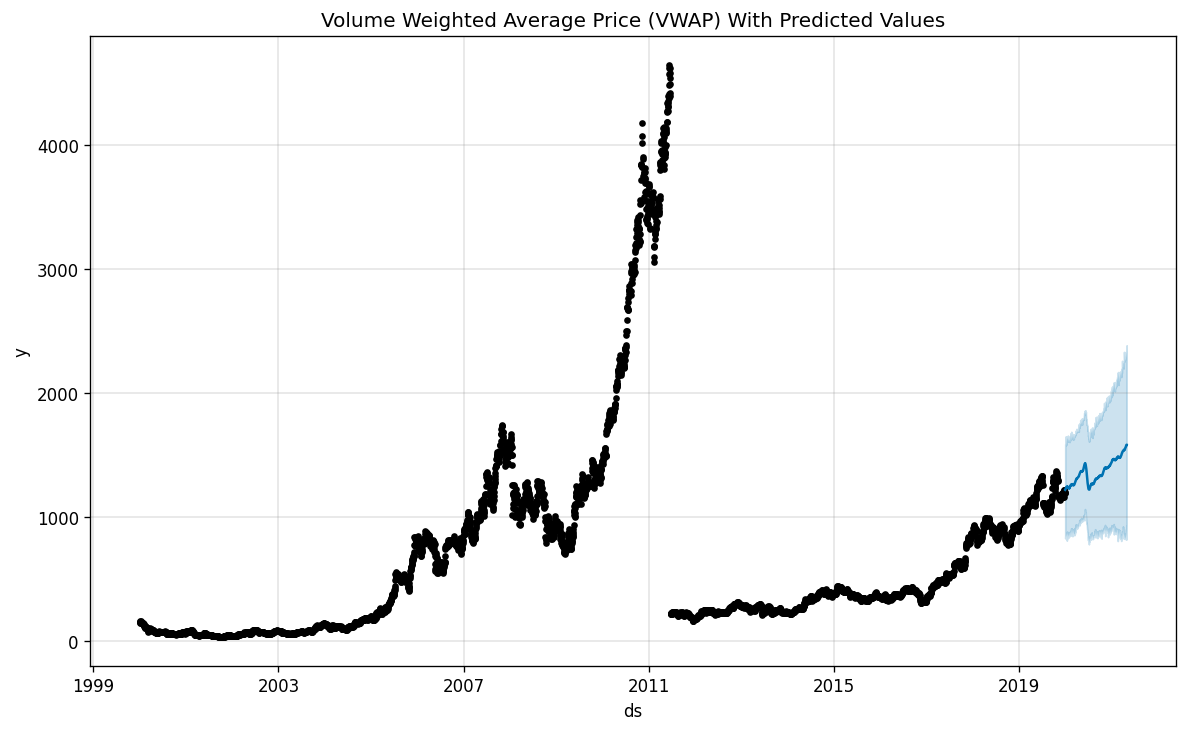

In [72]:
model.plot(forecast1)
plt.title('Volume Weighted Average Price (VWAP) With Predicted Values')
plt.show()

# RNN


In [112]:
df=df_titan.loc[:,['Date','VWAP']]
df

,Date,VWAP
0,2000-01-03,154.36
1,2000-01-04,146.72
2,2000-01-05,142.95
3,2000-01-06,147.87
4,2000-01-07,148.63
...,...,...
5301,2021-04-26,1479.58
5302,2021-04-27,1494.21
5303,2021-04-28,1504.73
5304,2021-04-29,1510.30


In [113]:
import itertools
import pandas as pd
import numpy as np
import os
import random 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN, RNN, Input, Bidirectional
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.model_selection import GroupKFold

from tensorflow.keras.optimizers.schedules import ExponentialDecay

from sklearn.metrics import mean_squared_error as mse

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [114]:
def my_rmse(x,y):
    return(np.round( np.sqrt(mse(x,y)) ,4))

In [115]:
def create_dataset(dataset, look_back, look_ahead):
    xdat, ydat = [], []
    for i in range(len(df) - look_back -look_ahead):
        xdat.append(df[i:i+ look_back ,0])
        ydat.append(df[i+ look_back : i + look_back + look_ahead,0])
    xdat, ydat = np.array(xdat), np.array(ydat).reshape(-1,look_ahead)
    return xdat, ydat

In [116]:
def prepare_split(xdat, ydat, cutoff = 5000, timesteps = 50):
    xtrain, xvalid = xdat[:cutoff,:], xdat[cutoff:,]
    ytrain, yvalid = ydat[:cutoff,:], ydat[cutoff:,]

    # reshape into [batch size, time steps, dimensionality]
    xtrain = xtrain.reshape(-1, timesteps, 1)
    xvalid = xvalid.reshape(-1, timesteps, 1)

    return xtrain, ytrain, xvalid, yvalid 

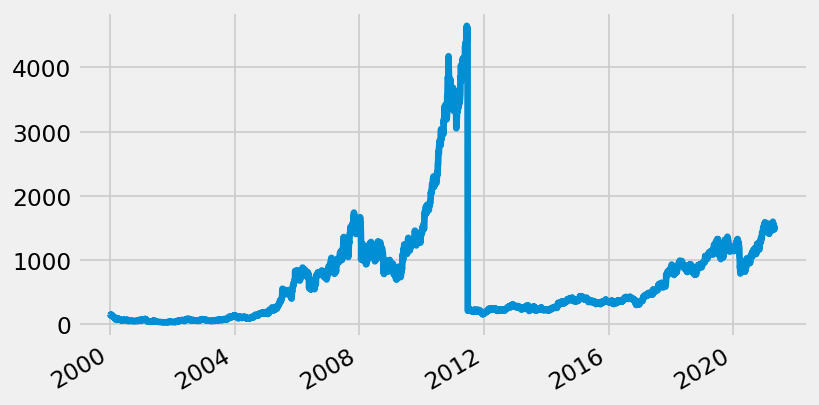

In [117]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",  inplace=True)
df.VWAP.plot(xlabel = '')


In [118]:
df

,VWAP
Date,
2000-01-03,154.36
2000-01-04,146.72
2000-01-05,142.95
2000-01-06,147.87
2000-01-07,148.63
...,...
2021-04-26,1479.58
2021-04-27,1494.21
2021-04-28,1504.73


In [119]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [120]:
# use 50 historical observations, predict 1 step ahead
look_back = 50
look_ahead = 1

xdat, ydat = create_dataset(df, look_back = look_back, look_ahead = look_ahead)

# We only want to forecast a single value for each series => target is a column
print(xdat.shape, ydat.shape)

(5255, 50) (5255, 1)


In [121]:
xtrain, ytrain, xvalid, yvalid = prepare_split(xdat, ydat, cutoff = 5000, timesteps = look_back)

print(xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape)

(5000, 50, 1) (255, 50, 1) (5000, 1) (255, 1)


In [122]:
def create_model1():    
    
    model=Sequential()
    model.add(SimpleRNN(10,input_shape= [None,1], return_sequences = True))
    model.add(SimpleRNN(10,input_shape= [None,1]))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model
    
model1 = create_model1()
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, None, 10)          120       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


class CFG:
    data_folder = '../input/tsdata-1/'
    img_dim1 = 20
    img_dim2 = 10
    nepochs = 6
    seed = 42
    EPOCH = 300
    bsize = 16
    BATCH_SIZE = 1024


In [123]:
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                           patience = 5, mode = 'min', verbose = 1,
                           restore_best_weights = True)

In [124]:
model1.fit(xtrain, ytrain, validation_data=(xvalid, yvalid), 
                  epochs = 6, batch_size = 16, callbacks=[ early_stop])

y_pred1 = model1.predict(xvalid)
y_pred1 = scaler.inverse_transform(y_pred1)

Epoch 1/6
313/313 [==============================] - 8s 20ms/step - loss: 0.0080 - val_loss: 3.9589e-04
Epoch 2/6
313/313 [==============================] - 6s 19ms/step - loss: 0.0014 - val_loss: 2.4489e-04
Epoch 3/6
313/313 [==============================] - 6s 19ms/step - loss: 8.8751e-04 - val_loss: 1.4961e-04
Epoch 4/6
313/313 [==============================] - 6s 19ms/step - loss: 6.4483e-04 - val_loss: 1.6487e-04
Epoch 5/6
313/313 [==============================] - 6s 19ms/step - loss: 5.2682e-04 - val_loss: 9.0045e-05
Epoch 6/6
313/313 [==============================] - 6s 19ms/step - loss: 4.3148e-04 - val_loss: 9.5604e-05
Epoch 6: early stopping
8/8 [==============================] - 0s 6ms/step


In [125]:
print('RMSE: ' + str(my_rmse(y_pred1, scaler.inverse_transform(yvalid))))

RMSE: 91.9174


In [101]:
# predict
y_pred1 = model1.predict(xvalid)
y_pred1 = scaler.inverse_transform(y_pred1)
yvalid1 =  scaler.inverse_transform(yvalid)

8/8 [==============================] - 0s 6ms/step


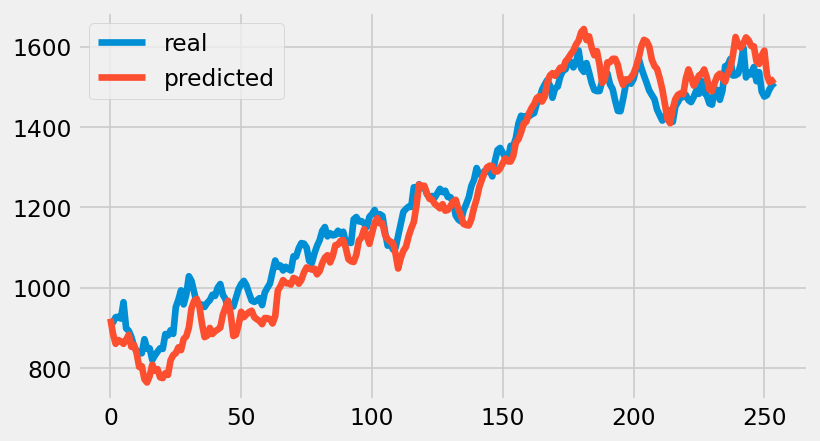

In [102]:
plt.plot(yvalid1, label = 'real')
plt.plot(y_pred1, label = 'predicted')
plt.ylabel('')
plt.legend()
plt.show()

# LSTM

In [126]:
def create_model2(out_dim):    
    
    model=Sequential()
    model.add(LSTM(10,input_shape= [None,1], return_sequences = True))
    model.add(LSTM(10,input_shape= [None,1]))
    model.add(Dense(out_dim))
    
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model
    
model2 = create_model2(out_dim = look_ahead)
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 10)          480       
                                                                 
 lstm_3 (LSTM)               (None, 10)                840       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [127]:
look_back = 50
look_ahead = 10

xdat, ydat = create_dataset(df, look_back = look_back, look_ahead = look_ahead)

xtrain, ytrain, xvalid, yvalid = prepare_split(xdat, ydat, cutoff = 5000, timesteps= look_back)

In [128]:
model2.fit(xtrain, ytrain, validation_data=(xvalid, yvalid), 
                  epochs = 6, batch_size = 16, callbacks=[ early_stop])

y_pred2 = model2.predict(xvalid)
y_pred2 = scaler.inverse_transform(y_pred2)

Epoch 1/6
313/313 [==============================] - 19s 45ms/step - loss: 0.0050 - val_loss: 5.3179e-04
Epoch 2/6
313/313 [==============================] - 13s 41ms/step - loss: 0.0020 - val_loss: 2.6502e-04
Epoch 3/6
313/313 [==============================] - 13s 40ms/step - loss: 0.0019 - val_loss: 3.3153e-04
Epoch 4/6
313/313 [==============================] - 13s 40ms/step - loss: 0.0017 - val_loss: 4.0324e-04
Epoch 5/6
313/313 [==============================] - 13s 40ms/step - loss: 0.0015 - val_loss: 1.9133e-04
Epoch 6/6
313/313 [==============================] - 13s 40ms/step - loss: 0.0014 - val_loss: 1.6884e-04
Epoch 6: early stopping
8/8 [==============================] - 1s 9ms/step


In [141]:
y_pred2 = model2.predict(xvalid)
y_pred2 = scaler.inverse_transform(y_pred2)
yvalid2 =  scaler.inverse_transform(yvalid)

8/8 [==============================] - 0s 12ms/step


In [144]:
# from sklearn.metrics import mean_squared_error

# rms = mean_squared_error(yvalid2, y_pred2, squared=False)

In [148]:
arr = np.array(yvalid2)
print(arr.shape)
ar=np.array(y_pred2)
print(ar.shape)

(246, 10)
(246, 1)


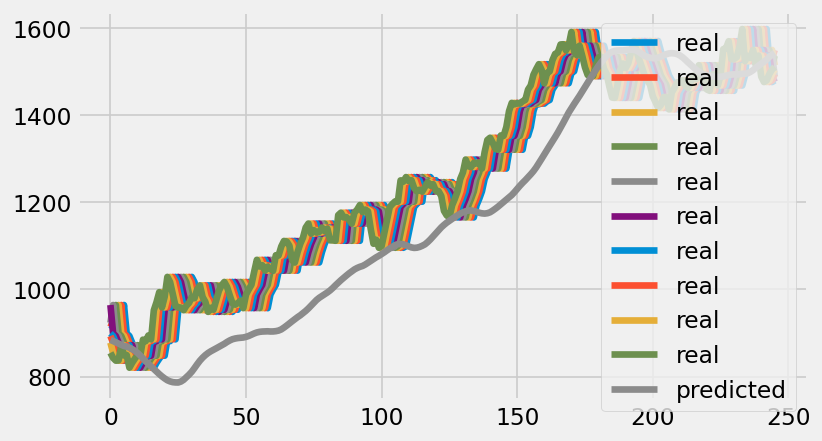

In [142]:
plt.plot(yvalid2, label = 'real')
plt.plot(y_pred2, label = 'predicted')
plt.ylabel('')
plt.legend()
plt.show()